In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset

In [6]:
# Load training dataset as dictionary of numpy arrays
dataset_path = "dataset/train.npz"
data_dict = np.load(dataset_path)

# Extract design and scattering paramters array
# TM: S_inplane
# TE: S_outofplane
design = data_dict["pattern"]
S      = data_dict["S_inplane"]

# The design array has shape (samples, parameters).
# In other words, design[0,:] is the 32 design parameters d_i of the grating
print("Shape of design array:", design.shape)

# The S array has shape (samples, out_ports).
# The input port is always normal incidence from below.
# The output ports are numbered as follows:
# 0: Bottom -2 
# 1: Bottom -1
# 2: Bottom  0
# 3: Bottom +1
# 4: Bottom +2
# 5: Top -1
# 6: Top  0
# 7: Top +1
print("Shape of S array:", S.shape)

# These are the scattering parameters used in the paper
Sm1 = S[:,5]
S0  = S[:,6]
Sp1 = S[:,7]

Shape of design array: (24000, 32)
Shape of S array: (24000, 8)


# Plot a sample from the dataset

Design parameters:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 1. 1. 0.]


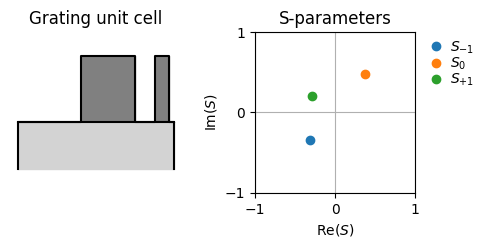

In [7]:
from parameterization import visualize

sample_id = 0

fig, axs = plt.subplots(1, 2, figsize=(5,2.5))

ax = axs[0]
ax.set_title("Grating unit cell")

visualize(ax, design[sample_id])
print("Design parameters:")
print(design[sample_id])


ax = axs[1]
ax.set_title("S-parameters")
ax.plot(np.real(Sm1[sample_id]), np.imag(Sm1[sample_id]), "C0o", label="$S_{-1}$")
ax.plot(np.real(S0[sample_id]),  np.imag(S0[sample_id]),  "C1o", label="$S_{0}$")
ax.plot(np.real(Sp1[sample_id]), np.imag(Sp1[sample_id]), "C2o", label="$S_{+1}$")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.grid()
ax.set_xlabel("Re($S$)")
ax.set_ylabel("Im($S$)")
ax.set_aspect(1)
ax.legend(loc="upper left", bbox_to_anchor=(1,1), borderpad=0, frameon=False, labelspacing=0, handletextpad=0)

fig.tight_layout()
